<a href="https://colab.research.google.com/github/Spocklight/Data_Mining_Bases/blob/main/Bases_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Técnicas Básicas de NLP en el Text Mining

En el Text Mining y el NLP se utilizan librerías tradicionales de Data Mining, como scikit-learn o Tensorflow, pero también librerías específicas para trabajar con texto. 

Existen multitud de librerías diseñadas para preprocesar textos, transformar textos en vectores u orientadas a poner modelos de TM en producción. En este notebook introduciremos 2 de ellas, viendo algunas de sus funcionalides y como aplicar diferentes técnicas básicas de NLP utilizandolas. 

En primer lugar, instalaremos os las librerías de programación que utilizaremos en este notebook:
- [**NLTK**](https://www.nltk.org//): NLTK es una de las librerías principales para trabajar con textos libres que fue creada por la Universidad de Pennsylvania en el año 2001. Aunque su uso principal ha estado unido  a entornos de investigación y educación, las facilidades en su uso y sus características la convierten en una de las librerías con un mayor número de recursos de aprendizaje como libros, foros o tutoriales. Contiene una gran cantidad de conjuntos de datos típicos para el aprendizaje de NLP y es muy utilizada en tareas para el preprocesado de texto antes de introducirlo en algoritmos de Inteligencia Artificial.


In [9]:
# Instalamos nltk
#!pip install nltk
# Importamos
import nltk
# Complementos de la librería necesarios para su funcionamiento.
# Todas las opciones aquí https://www.nltk.org/nltk_data/ 
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

- [**Spacy**](https://spacy.io/): A diferencia de NLTK, que surgió y ha sido diseñada para ser utilizada en entornos de investigación, Spacy se centra en proporcionar herramientas para poder incorporar sistemas de Text Mining en producción por facilidad. De hecho, su fácil interconexión con otras librerías del mundo de la ciencia de datos, junto a la incorporación de modelos pre-entrenados con técnicas de Deep Learning y su facilidad para trabajar con múltiples lenguajes de programación, la han convertido en una de las librarías más usadas, si no la que más, en la actualidad. 

    Descargamos la librería y los modelos pre-entretados *en_core_web_sm* y *es_core_web_sm*, modelos de DNN entrenados con noticias, blogs y comentarios en inglés y español respectivamente.


In [19]:
# Instalamos textacy
!pip install textacy
# Instalamos spacy y uno de sus modelos
#!pip install pip setuptools wheel
!pip install spacy
# Descargamos modelos pre-entrenados de spacy.
!python -m spacy download en_core_web_sm
!python -m spacy download es_core_news_sm

# Descargamos datos del repositorio de github
#!wget "https://github.com/luisgasco/ntic_master_datos/raw/main/datasets/news_summary.csv"

  Using cached textacy-0.11.0-py3-none-any.whl (200 kB)
  Using cached pyphen-0.12.0-py3-none-any.whl (2.0 MB)
  Using cached cytoolz-0.11.2.tar.gz (481 kB)
  Using cached jellyfish-0.9.0.tar.gz (132 kB)
  Using cached spacy-3.3.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.2 MB)
     |████████████████████████████████| 457 kB 9.6 MB/s 
     |████████████████████████████████| 42 kB 1.8 MB/s 
     |████████████████████████████████| 10.1 MB 49.0 MB/s 
     |████████████████████████████████| 181 kB 73.0 MB/s 
     |████████████████████████████████| 660 kB 50.6 MB/s 
     |████████████████████████████████| 58 kB 7.1 MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.11.2-cp37-cp37m-linux_x86_64.whl size=1236731 sha256=283424c4b1aa4d3118fd415688f8cd3fec0866039b762454b3c598763f6b2342
  Stored in directory: /root/.cache/pip/wheels/38/70/71/ca13ea3d36ccd0b3d0ec7d7a4ca67522048d695b556bba4f59
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl s

     |████████████████████████████████| 12.8 MB 6.3 MB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     |████████████████████████████████| 12.9 MB 61.2 MB/s 
  Attempting uninstall: es-core-news-sm
    Found existing installation: es-core-news-sm 2.2.5
    Uninstalling es-core-news-sm-2.2.5:
      Successfully uninstalled es-core-news-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [3]:
# Librerías tpipicas
import pandas as pd


## Corpus y corpora



Todo proceso de análisis textual comienza con un dataset de documentos textuales, que generalmente se llama **corpus** o *corpora* cuando tratamos con varios datasets. El corpus generalmente está compuesto de texto bruto con algunos metadatos asociados, aunque esto no tiene por qué ser así. 

En este Notebook vamos a trabajar con un corpus de noticias distribuido en la plataforma Kaggle llamado [*News summary*](https://www.kaggle.com/sunnysai12345/news-summary). Este corpus está distribuido en formato *csv*, sin embargo es normal encontrar corpus con el formato *tsv*, o disponer de corpus almacenados en base de datos como MongoDB.

En primer lugar lo leeremos de la ruta donde se ha descargado `/content/news_summary.csv`:


In [4]:
!wget "https://github.com/luisgasco/ntic_master_datos/raw/main/datasets/news_summary.csv"
news_summary = pd.read_csv('../content/news_summary.csv', encoding='latin-1')
news_summary.head(3)

--2022-05-20 12:16:31--  https://github.com/luisgasco/ntic_master_datos/raw/main/datasets/news_summary.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/luisgasco/ntic_master_datos/main/datasets/news_summary.csv [following]
--2022-05-20 12:16:31--  https://raw.githubusercontent.com/luisgasco/ntic_master_datos/main/datasets/news_summary.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11896415 (11M) [text/plain]
Saving to: ‘news_summary.csv’

news_summary.csv    100%[===================>]  11.34M  --.-KB/s    in 0.04s   

2022-05-20 12:16:31 (304 MB/s) - ‘news_summary.csv’ saved [11896415/11

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...


El dataset está compuesto por un conjunto de filas, que llamamos documentos. Cada documento tiene un conjunto de metadatos como el autor, la fecha, el titular de la noticia y la web de la noticia y el texto asociado a esta. 

Cada uno de los textos puede separarse en párrafos, frases y palabras según el tipo de documento y el tipo de análisis que se le vaya a aplicar. 

En este caso, al ser un ejercicio, únicamente vamos a trabajar con el texto de los documentos, correspondiente el campo "text", así que extraeremos y transformaremos esta columna en una lista para trabajar más comodos:


In [5]:
# Transformar la columna "text" a una lista
texto_noticias = news_summary["text"].to_list()
print(type(texto_noticias))

<class 'list'>


Vamos a mirar el número de noticias que contiene nuestro corpus:

In [9]:
print("El corpus news_summary contiene un total de {} documentos".format(len(texto_noticias)))

El corpus news_summary contiene un total de 4514 documentos


## Tokenización

El texto bruto está compuesto por una secuencia de caracteres. Antes de su análisis los textos son divididos en fragmentos más pequeños conocidos como tokens. Un token puede ser tanto una palabra, como un símbolo de puntuación, un número o un emoticono, en el caso de estar analizando datos de redes sociales.

El proceso de división del texto en tokens se llama tokenización. Aquí se muestra el proceso tanto para la librería Spacy como para la librería NLTK para un único texto del corpus.

***NLTK***

El tokenizador estándar de NLTK se llama word_tokenize. Podemos ver más información dentro de la web de documentación de NLTK (dentro del módulo word_tokenize [texto del enlace](https://www.nltk.org/api/nltk.tokenize.html))


También podemos utilizar la línea de código `?libreria.modulo.funcion` para que nos aparezca la ayuda de la función en la parte derecha de la pantalla.

In [39]:
?nltk.tokenize.word_tokenize

In [7]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
# Cogemos un subset de las 100 primeras noticias para acelerar el proceso:
subset_noticias = texto_noticias[0:100]

In [ ]:
# Segmentar las frases de la noticia 5 (indice 4)
sentences = sent_tokenize(subset_noticias[4])
for num,sentence in enumerate(sentences):
    print('La oración número {} es: \n {}'.format(num, sentence))

Podemos segmentar todos los tokens de un documento de forma global.

In [ ]:
# Segmentar los tokens de la noticia 5 (indice 4)
tokens = word_tokenize(subset_noticias[4])
for num,token in enumerate(tokens):
    print('El token {} es {} '.format(num,token))

Pero también se puede segmentar los tokens de cada una de las frases separadamente:

In [ ]:
# Segmentar las frases de la noticia 5 (indice 4)
sentences = sent_tokenize(subset_noticias[4])
for num_sen, sentence in enumerate(sentences):
  # Segmentar los tokens de las frases de la noticia 5 (indice 4)
  tokens = word_tokenize(sentence)
  for num_token, token in enumerate(tokens):
    print("El token {} de la frase {} es: {}".format(num_token, num_sen,token))

***Spacy***

En Spacy el funcionamiento es algo distinto:
En primer lugar es necesario cargar un objeto spacy pre-entrenado proporcionado por los creadores de la librería (o por cualquier otro usuario que lo haya compartido). 

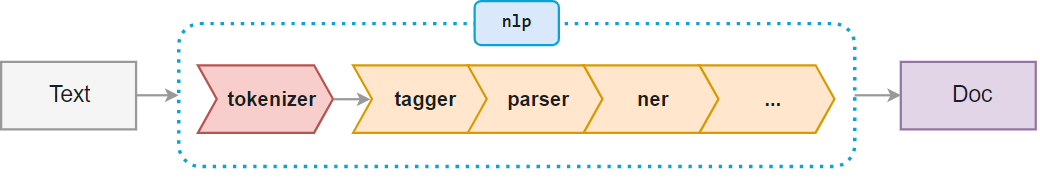
Los modelos incorporados con Spacy se pueden encontrar en su[ web](https://spacy.io/usage/facts-figures#benchmarks). Estos objetos permiten procesar documentos completos y extraer información de ellos como los tokens, PoS, o lemmas.

En primer lugar cargamos el modelo:

In [2]:
import spacy
#import en_core_web_sm
# Cargamos el modelo preentrenado con textos en inglés ("en_core_web_sm")
#nlp = en_core_web_sm.load()
nlp = spacy.load("en_core_web_sm")

A continuación, vamos a coger el mismo subset de noticias y vamos a aplicar el objeto nlp creado anteriormente a cada uno de los documentos

In [6]:
# Cogemos un subset de las noticias para acelerar el proceso:
subset_noticias = texto_noticias[0:100]
# Obtener una lista de objetos de tipo spacy procesados por spacy
documento = nlp(subset_noticias[0])
type(documento)

NameError: ignored

In [16]:
# Obtenemos la lista de docuimentos procesados por el objeto nlp de spacy
lista_documentos = [nlp(noticia) for noticia in subset_noticias]

In [17]:
type(lista_documentos[0])

spacy.tokens.doc.Doc


Esto ha transformado nuestros textos a objetos de tipo [`spacy.tokens.doc.Doc`](https://spacy.io/api/doc) que tiene una serie de atributos y métodos útiles para nuestro pipeline.

Como hemos hecho antes, en primer lugar vamos a extraer las frases del documento 4.


In [19]:
# Segmentamos el texto de la noticia 4 en oraciones:
for num,sentence in enumerate(lista_documentos[4].sents):
    print('La oración número {} es: \n {} \n'.format(num, sentence))

La oración número 0 es: 
 Hotels in Maharashtra will train their staff to spot signs of sex trafficking, including frequent requests for bed linen changes and 'Do not disturb' signs left on room doors for days. 

La oración número 1 es: 
 A mobile phone app called Rescue Me, which will allow staff to alert police of suspicious behaviour, will be developed. 

La oración número 2 es: 
 The initiative has been backed by the Maharashtra government. 



Vamos a mostrar los tokens de cada una de las frases.


In [21]:
# Además también podemos dividir cada frase en tokens para la noticia 4:
for num,sentence in enumerate(lista_documentos[4].sents):
    print('La oración {} tiene {} tokens'.format(num, len(sentence)))
    tokens=[word for word in sentence]
    print(tokens)

La oración 0 tiene 35 tokens
[Hotels, in, Maharashtra, will, train, their, staff, to, spot, signs, of, sex, trafficking, ,, including, frequent, requests, for, bed, linen, changes, and, ', Do, not, disturb, ', signs, left, on, room, doors, for, days, .]
La oración 1 tiene 23 tokens
[A, mobile, phone, app, called, Rescue, Me, ,, which, will, allow, staff, to, alert, police, of, suspicious, behaviour, ,, will, be, developed, .]
La oración 2 tiene 10 tokens
[The, initiative, has, been, backed, by, the, Maharashtra, government, .]


## Unigramas, Bigramas y N-gramas

En ocasiones, la información proporcionada por un token no es suficiente. 

Existen palabras que tienen relación con los términos previos y/o posteriores. Desde un punto de vista *naive*, la manera de conseguir el contexto de cada palabra es mediante los n-gramas.

Los n-gramas son secuencias de n tokens consecutivos provenientes de un texto. La combinación de n-gramas puede proporcionar información sobre la temática de un texto. Generalmente se generan unigramas, que son iguales que los tokens del texto. Los Bigramas, que son combinaciones pareadas de tokens y los trigramas que son triadas de tokens 

***NLTK***

En NLTK los ngrams se consiguen a traves de un método dentro del módulo util de la librería.

In [1]:
from nltk.util import ngrams
?ngrams

Vamos a generar una función para crear n-grams de distinto tamaño!

In [2]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.util import ngrams
# Función para extraer n-grams de una frase.
def extraer_ngramas(datos, numero):
    # Uso Utilizar la función ngrams para generar ngrams de textos 
    n_grams = ngrams(word_tokenize(datos), numero)
    # Transformo el resultado en una lista
    return [ ' '.join(grams) for grams in n_grams]

Ahora vamos a generar un conjunto de bigramas, trigramas y 4-gramas de la noticia 4:

In [16]:

# Cogemos un subset de las noticias para acelerar el proceso:
subset_noticias = texto_noticias[0:100]

# Calculamos los bigramas, trigramas y 4 gramas de la noticia 4
print("Unigramas: ", extraer_ngramas(subset_noticias[4],1))


Unigramas:  ['Hotels', 'in', 'Maharashtra', 'will', 'train', 'their', 'staff', 'to', 'spot', 'signs', 'of', 'sex', 'trafficking', ',', 'including', 'frequent', 'requests', 'for', 'bed', 'linen', 'changes', 'and', "'Do", 'not', 'disturb', "'", 'signs', 'left', 'on', 'room', 'doors', 'for', 'days', '.', 'A', 'mobile', 'phone', 'app', 'called', 'Rescue', 'Me', ',', 'which', 'will', 'allow', 'staff', 'to', 'alert', 'police', 'of', 'suspicious', 'behaviour', ',', 'will', 'be', 'developed', '.', 'The', 'initiative', 'has', 'been', 'backed', 'by', 'the', 'Maharashtra', 'government', '.']


In [17]:
# Calculamos los bigramas, trigramas y 4 gramas de la noticia 4
print("Bigramas: ", extraer_ngramas(subset_noticias[4],2))
print("Trigramas: ", extraer_ngramas(subset_noticias[4],3))
print("4-gramas: ", extraer_ngramas(subset_noticias[4],4))



Bigramas:  ['Hotels in', 'in Maharashtra', 'Maharashtra will', 'will train', 'train their', 'their staff', 'staff to', 'to spot', 'spot signs', 'signs of', 'of sex', 'sex trafficking', 'trafficking ,', ', including', 'including frequent', 'frequent requests', 'requests for', 'for bed', 'bed linen', 'linen changes', 'changes and', "and 'Do", "'Do not", 'not disturb', "disturb '", "' signs", 'signs left', 'left on', 'on room', 'room doors', 'doors for', 'for days', 'days .', '. A', 'A mobile', 'mobile phone', 'phone app', 'app called', 'called Rescue', 'Rescue Me', 'Me ,', ', which', 'which will', 'will allow', 'allow staff', 'staff to', 'to alert', 'alert police', 'police of', 'of suspicious', 'suspicious behaviour', 'behaviour ,', ', will', 'will be', 'be developed', 'developed .', '. The', 'The initiative', 'initiative has', 'has been', 'been backed', 'backed by', 'by the', 'the Maharashtra', 'Maharashtra government', 'government .']
Trigramas:  ['Hotels in Maharashtra', 'in Maharasht

***Spacy***

Spacy no tiene actualmente integrado esta funcionalidad, así que utilizaremos una librería auxiliar que funciona con sus clases, llamada textacy.

Primero, importamos las librerías, el modelo en inglés y como antes, procesamos con el modelo los documentos:

In [7]:
import spacy
#import textacy

# Cargamos el modelo preentrenado con textos en inglés
nlp=spacy.load("en_core_web_sm")

# Cogemos un subset de las noticias para acelerar el proceso:
subset_noticias = texto_noticias[0:100]
# Creamos un objeto spacy nlp con los textos para que sea preprocesado con el modelo anterior
nlp_texto = [nlp(texto_to_process) for texto_to_process in subset_noticias]

Utilizaremos la librería textacy para extraer esta información:

In [8]:
import textacy
 # Calculamos los bigramas, trigramas y 4 gramas de la noticia 4
print("Bigramas: ", list(textacy.extract.ngrams(nlp_texto[4],2, min_freq=1, filter_stops = False, filter_punct =False)))


Bigramas:  [Hotels in, in Maharashtra, Maharashtra will, will train, train their, their staff, staff to, to spot, spot signs, signs of, of sex, sex trafficking, trafficking,, , including, including frequent, frequent requests, requests for, for bed, bed linen, linen changes, changes and, and ', 'Do, Do not, not disturb, disturb', ' signs, signs left, left on, on room, room doors, doors for, for days, days., . A, A mobile, mobile phone, phone app, app called, called Rescue, Rescue Me, Me,, , which, which will, will allow, allow staff, staff to, to alert, alert police, police of, of suspicious, suspicious behaviour, behaviour,, , will, will be, be developed, developed., . The, The initiative, initiative has, has been, been backed, backed by, by the, the Maharashtra, Maharashtra government, government.]


In [9]:
print("Trigramas: ", list(textacy.extract.ngrams(nlp_texto[4],3, min_freq=1, filter_stops = False, filter_punct =False)))
print("4-gramas: ", list(textacy.extract.ngrams(nlp_texto[4],4, min_freq=1, filter_stops = False, filter_punct =False)))



Trigramas:  [Hotels in Maharashtra, in Maharashtra will, Maharashtra will train, will train their, train their staff, their staff to, staff to spot, to spot signs, spot signs of, signs of sex, of sex trafficking, sex trafficking,, trafficking, including, , including frequent, including frequent requests, frequent requests for, requests for bed, for bed linen, bed linen changes, linen changes and, changes and ', and 'Do, 'Do not, Do not disturb, not disturb', disturb' signs, ' signs left, signs left on, left on room, on room doors, room doors for, doors for days, for days., days. A, . A mobile, A mobile phone, mobile phone app, phone app called, app called Rescue, called Rescue Me, Rescue Me,, Me, which, , which will, which will allow, will allow staff, allow staff to, staff to alert, to alert police, alert police of, police of suspicious, of suspicious behaviour, suspicious behaviour,, behaviour, will, , will be, will be developed, be developed., developed. The, . The initiative, The i


**Visualización:**

A continuación, vamos a calcular los tokens y bigramas de todo el corpus de documentos y vamos a generar una visualización.


In [1]:
def frecuencia_tokens(lista): 
    # Creamos diccionario vacío 
    frecuencia = {} 
    for item in lista: 
        if (item in frecuencia): 
            frecuencia[item] += 1
        else: 
            frecuencia[item] = 1
    return frecuencia

Primero extraemos los tokens de todos los textos y los introducimos en una lista común.

In [10]:
lista_tokens = list()
for i in subset_noticias:
  # Tokenizamos cada documento con word_tokenize()
  tokens_document = word_tokenize(i)
  # Añadimos esos tokens como nuevos elementos
  # Si usamos append se crearía una lista de listas, de este modo añadimos los
  lista_tokens.extend(tokens_document)

In [12]:
#Calculamos la frecuencia:

dicta_freq = frecuencia_tokens(lista_tokens)
print(dicta_freq)

{'The': 82, 'Administration': 3, 'of': 147, 'Union': 3, 'Territory': 2, 'Daman': 2, 'and': 125, 'Diu': 2, 'has': 60, 'revoked': 1, 'its': 17, 'order': 2, 'that': 63, 'made': 4, 'it': 32, 'compulsory': 4, 'for': 68, 'women': 8, 'to': 136, 'tie': 2, 'rakhis': 2, 'their': 11, 'male': 3, 'colleagues': 2, 'on': 76, 'the': 271, 'occasion': 1, 'Rakshabandhan': 3, 'August': 7, '7': 3, '.': 281, 'administration': 1, 'was': 43, 'forced': 2, 'withdraw': 1, 'decision': 3, 'within': 3, '24': 2, 'hours': 3, 'issuing': 1, 'circular': 3, 'after': 25, 'received': 3, 'flak': 1, 'from': 29, 'employees': 4, 'slammed': 3, 'social': 3, 'media': 3, 'Malaika': 2, 'Arora': 1, 'an': 25, 'Instagram': 2, 'user': 2, 'who': 17, 'trolled': 4, 'her': 22, '``': 58, 'divorcing': 1, 'a': 156, 'rich': 1, 'man': 10, "''": 58, 'having': 1, 'fun': 1, 'with': 31, 'alimony': 1, 'Her': 1, 'life': 4, 'now': 4, 'is': 48, 'all': 5, 'about': 15, 'wearing': 3, 'short': 2, 'clothes': 1, ',': 242, 'going': 1, 'gym': 1, 'or': 4, 'salo

Después calculamos la frecuencia con la función generada.

In [14]:
%%time
# Calculemos la frecuencia
#dict_freq = frecuencia_tokens(lista_tokens)
dicta_freq["Road"]

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.54 µs


2

Tambien podemos utilizar un counter (más eficiente):

In [15]:
from collections import Counter

In [16]:
%%time
dict_freq2 = Counter(lista_tokens)
dict_freq2["Road"]

CPU times: user 2.36 ms, sys: 0 ns, total: 2.36 ms
Wall time: 2.37 ms


Vamos a ordenar el diccionario, para tomar sólo los valores mayores de 20:

In [17]:
# Ordenamos el diccionario por la frecuencia de sus palabras
dict_freq_order = sorted(dicta_freq.items(), key=lambda x: x[1], reverse=True)
token_names = list()
token_freqs = list()
for i in dict_freq_order:
  if i[1] > 30:
    token_names.append(i[0])
    token_freqs.append(i[1])


Dibujemos

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

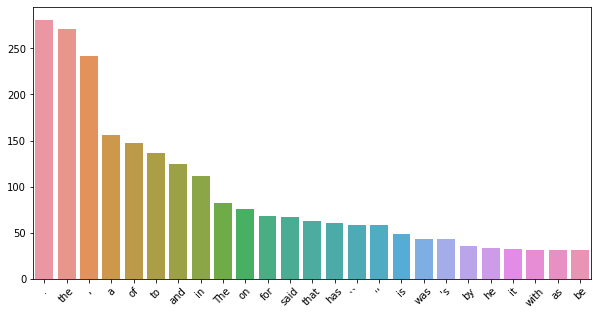

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
sns_g = sns.barplot(x=token_names, y=token_freqs)
plt.xticks(rotation=45)

Se podrían quitar los símbolos de puntuación y stopwords con:


```
import string
from nltk.corpus import stopwords
punctuations = string.punctuation
stop_words = stopwords.words('english')
```




## Lematización y stemming


Las lemas son las formas canónicas del léxico de un idioma. Por ejemplo, en el caso del español, los verbos presentan una flexión verbal, conocida como comúnmente como conjungación, utilizada para adaptar el verbo a diferentes situaciones de contexto (número, género y tiempo verbal) y presentando distinta forma escrita. En algunas ocasiones, es útil utilizar el lema de los verbos y otras palabras para reducir la dimensionalidad en los modelos predictivos. Este proceso es conocido como lematización. Cuando se lematiza se obtienen palabras reales ya que se utilizan diccionarios jerárquicos para obtener el lema. Este diccionario jerárquico es conocido como WordNet, y será explicado con profundidad más adelante.

Un caso específico y simple de la lematización es el stemming, que consiste en utilizar reglas sintácticas para quitar la finalización de las palabras y reducirlas así una forma común llamada stem. Hay muchos stemmers populares como el de Porter o el de Snowball. **Es importante mencionar que no siempre que se hace stemming de una palabra esta es una palabra real, si no una palabra sin su última(s) letras**

A continuación se muestran ests procesos tanto para NLTK como para Spacy:

***NLTK***

**Stemming**

En NLTK hay varias implementaciones de algoritmos de Stemming. Aquí mostraremos los dos más utilizados: 

- Algoritmo de Porter Stemming: Algoritmo que solo funciona en inglés y que funciona correctamente con la mayoría de las palabras en ese idioma. Sirve para quitar sustituir los sufijos de las plabras.

- Algoritmo de SnowballStemmer: Algoritmo de Stemming que soporta 13 lenguas en NLTK, incluyendo español. Es una versión mejorada del algoritmo de de Porter Stemming.


In [20]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer, SnowballStemmer

# In English
list_of_english_words = ["Speaking","speaks","Speaker","dogs","buses", "pieces",'compute', 'computer', 'computed', 'computing']
# Cargamos los Stemer
SStemmer = PorterStemmer()
PStemmer = SnowballStemmer("english")
print("Términos en inglés:")
for word in list_of_english_words:
  print("Palabra original: {}, Porter Stemmer: {}, Snowball: {}".format(word,PStemmer.stem(word),SStemmer.stem(word)))


Términos en inglés:
Palabra original: Speaking, Porter Stemmer: speak, Snowball: speak
Palabra original: speaks, Porter Stemmer: speak, Snowball: speak
Palabra original: Speaker, Porter Stemmer: speaker, Snowball: speaker
Palabra original: dogs, Porter Stemmer: dog, Snowball: dog
Palabra original: buses, Porter Stemmer: buse, Snowball: buse
Palabra original: pieces, Porter Stemmer: piec, Snowball: piec
Palabra original: compute, Porter Stemmer: comput, Snowball: comput
Palabra original: computer, Porter Stemmer: comput, Snowball: comput
Palabra original: computed, Porter Stemmer: comput, Snowball: comput
Palabra original: computing, Porter Stemmer: comput, Snowball: comput


In [22]:
#En español
lista_de_palabras_espanol = ["Hablando", "Habla", "Hablador", "Hablará", "ha hablado"]

SStemmer_spanish = SnowballStemmer("spanish")
print("Términos en español:")
for word in lista_de_palabras_espanol:
  print("Palabra original: {}, Snowball: {}".format(word, SStemmer_spanish.stem(word)))


Términos en español:
Palabra original: Hablando, Snowball: habl
Palabra original: Habla, Snowball: habl
Palabra original: Hablador, Snowball: hablador
Palabra original: Hablará, Snowball: habl
Palabra original: ha hablado, Snowball: ha habl


**Lematización**

Es algo un poco más potente

En español no se puede utilizar este método, dado que WordNet solo tiene términos en inglés. 
En este ejemplo vamos a lematizar palabras individuales, sin una categoría gramatical asignada. Si tuvieramos la PoS funcionaría con mejor rendimiento.


In [23]:
from nltk.stem import WordNetLemmatizer

lematizador = WordNetLemmatizer()
list_of_english_words = ["Speaking","speaks","Speaker","dogs","buses", "pieces",'compute', "computes", 'computer', 'computed', 'computing']
for word in list_of_english_words:
  print(" {} ---> {}".format(word,lematizador.lemmatize(word)))

  ##Parece que no está funcionando porque no hemos incluído categorías gramaticales


 Speaking ---> Speaking
 speaks ---> speaks
 Speaker ---> Speaker
 dogs ---> dog
 buses ---> bus
 pieces ---> piece
 compute ---> compute
 computes ---> computes
 computer ---> computer
 computed ---> computed
 computing ---> computing


Notesé que, a diferencia del stemmer, las palabras en plural que no se forman solo con una s y que se producían errores, aquí lo hace sin problemas.

***Spacy***

Debido al funcionamiento de Spacy, que funciona con modelos pre-entrenados de DeepLearning que incorporan distintas características, no existen funciones para hacer stemming y si para lematizar. Este proceso lo hace a partir de los conocimientos adquiridos en el proceso de entrenamiento del modelo con millones de textos.

In [24]:
import spacy  #Aquí la lematización funciona mucho mejor al ser un modelo entrenado

# Cargamos el modelo preentrenado con textos en inglés
nlp=spacy.load('en_core_web_sm')

english_sentence = "I bought five tickets on the internet, after a long wait 5 buses passed by, but none of them was the correct one"

word_sp = nlp(english_sentence)
for word in word_sp:
  print(word.text, "---->", word.lemma_)

I ----> -PRON-
bought ----> buy
five ----> five
tickets ----> ticket
on ----> on
the ----> the
internet ----> internet
, ----> ,
after ----> after
a ----> a
long ----> long
wait ----> wait
5 ----> 5
buses ----> bus
passed ----> pass
by ----> by
, ----> ,
but ----> but
none ----> none
of ----> of
them ----> -PRON-
was ----> be
the ----> the
correct ----> correct
one ----> one


## Part-Of-Speech Tagging

El *Part-Of-Speech Tagging* o la asignación de categorías gramaticales a una frase es el proceso en el que a una lista de palabras es etiquetada con su categoría gramatical, es decir que identifica si la palabra es un nombre, un adjetivo, un verbo, un adverbio, etc.

La asignación de etiquetas gramaticales es interesante cuando se quiere hacer análisis gramatical de una oración, para saber si una palabra tiene una acepción u otra, o incluso para extraer características artificiales cuando se quiere hacer una clasificación textual o similar.


**NLTK**

El listado de etiquetas de NLTK es el utilizado por UPenn (University of Pennsylvania). Para ver el listado completo solo hay que ejecutar la siguiente línea de código:


```
nltk.help.upenn_tagset()
```



In [25]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [26]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize

# Cogemos un subset de las noticias para acelerar el proceso:
subset_noticias = texto_noticias[0:100]


# Segmentamos los tokens
tokens = word_tokenize(subset_noticias[4])

# Utilizamos la función pos_tag() de nltk para obtener las etiquetas
pos_tag(tokens)


[('Hotels', 'NNS'),
 ('in', 'IN'),
 ('Maharashtra', 'NNP'),
 ('will', 'MD'),
 ('train', 'VB'),
 ('their', 'PRP$'),
 ('staff', 'NN'),
 ('to', 'TO'),
 ('spot', 'VB'),
 ('signs', 'NNS'),
 ('of', 'IN'),
 ('sex', 'NN'),
 ('trafficking', 'NN'),
 (',', ','),
 ('including', 'VBG'),
 ('frequent', 'JJ'),
 ('requests', 'NNS'),
 ('for', 'IN'),
 ('bed', 'NN'),
 ('linen', 'NN'),
 ('changes', 'NNS'),
 ('and', 'CC'),
 ("'Do", 'MD'),
 ('not', 'RB'),
 ('disturb', 'VB'),
 ("'", "''"),
 ('signs', 'NNS'),
 ('left', 'VBD'),
 ('on', 'IN'),
 ('room', 'NN'),
 ('doors', 'NNS'),
 ('for', 'IN'),
 ('days', 'NNS'),
 ('.', '.'),
 ('A', 'DT'),
 ('mobile', 'JJ'),
 ('phone', 'NN'),
 ('app', 'NN'),
 ('called', 'VBN'),
 ('Rescue', 'NNP'),
 ('Me', 'NNP'),
 (',', ','),
 ('which', 'WDT'),
 ('will', 'MD'),
 ('allow', 'VB'),
 ('staff', 'NN'),
 ('to', 'TO'),
 ('alert', 'VB'),
 ('police', 'NN'),
 ('of', 'IN'),
 ('suspicious', 'JJ'),
 ('behaviour', 'NN'),
 (',', ','),
 ('will', 'MD'),
 ('be', 'VB'),
 ('developed', 'VBN'),
 ('.',

**Spacy**

El listado de etiquetas POS utilizadas en Spacy es el siguiente:



```
SPACY_POS_LIST = ["ADJ", "ADP", "ADV", "AUX", "CONJ", "CCONJ",
                  "DET", "INTJ", "NOUN", "NUM", "PART", "PRON", 
                  "PROPN", "PUNCT", "SCONJ", "SYM", "VERB", "X", "SPACE"]
```

Si se necesita recordar que significa una de las abreviaciones se puede utilizar el código:

```
spacy.explain("NN")
# 'noun, singular or mass'
```




In [27]:
spacy.explain("NP")

'noun phrase'

In [28]:
# Cogemos un subset de las noticias para acelerar el proceso:
subset_noticias = texto_noticias[0:100]


# Segmentamos los tokens
tokens = nlp(subset_noticias[4])
for w in tokens:
    print( "The word '{}' is a {} ".format(w.text, w.pos_))

The word 'Hotels' is a NOUN 
The word 'in' is a ADP 
The word 'Maharashtra' is a PROPN 
The word 'will' is a VERB 
The word 'train' is a VERB 
The word 'their' is a DET 
The word 'staff' is a NOUN 
The word 'to' is a PART 
The word 'spot' is a VERB 
The word 'signs' is a NOUN 
The word 'of' is a ADP 
The word 'sex' is a NOUN 
The word 'trafficking' is a NOUN 
The word ',' is a PUNCT 
The word 'including' is a VERB 
The word 'frequent' is a ADJ 
The word 'requests' is a NOUN 
The word 'for' is a ADP 
The word 'bed' is a NOUN 
The word 'linen' is a NOUN 
The word 'changes' is a NOUN 
The word 'and' is a CCONJ 
The word ''' is a PUNCT 
The word 'Do' is a AUX 
The word 'not' is a PART 
The word 'disturb' is a VERB 
The word ''' is a PART 
The word 'signs' is a NOUN 
The word 'left' is a VERB 
The word 'on' is a ADP 
The word 'room' is a NOUN 
The word 'doors' is a NOUN 
The word 'for' is a ADP 
The word 'days' is a NOUN 
The word '.' is a PUNCT 
The word 'A' is a DET 
The word 'mobile' is 

## Named-entiy recognition

La extración de entidades de un documento es una labor esencial en la análitica de textos. En algunas ocasiones puede ser interesante si se nombra a una persona, a una ciudad, un país o incluso a un medicamento, en el caso de los textos clínicos. 

Existen sistemas NER (Named-entity recognition) específicos para cada campo de aplicación. Las librerías de NLTK y Spacy disponen de modelos para detectar entidades de ámbito general, aunque existen modelos mucho más espcificos para reconocer entidades muy específicos como por ejemplo síntomas en textos clinicos (mención a BSC).

**NLTK**

En NLTK antes de detectar es necesario la obtención de la tokenización y la POS tag antes de identificar entidades, ya que utiliza las etiquetas POS y reglas internas para encontrar que elementos son personas u otro tipo de entidad. 

Cuando los textos son extraidos de internet, hay que quitar los espacios extras que puede haber en una frase, para que se extraiga mejor las categorías gramaticales de éstos y poder así reconocer mejor las organizaciones o personas en el texto. En este caso están bastante limpios, así que no hace falta hacerlo. 

Importamos la función `ne_chunk`, que necesita un conjunto de tokens etiquetados PoS previamente. Así que antes hay que preprocesar el documento. Lo haremos con la función `preprocesar()`

In [29]:
from nltk.chunk import ne_chunk
?ne_chunk

In [33]:
from nltk.chunk import ne_chunk
subset_noticias = texto_noticias[0:100]

def preprocess(documento):
  # word_tokenizer
  documento_tok = word_tokenize(documento)
  # pos_tag
  documento_pos = pos_tag(documento_tok)
  return documento_pos

Ejecutemos la función sobre la noticia 4 y extraigamos las named-entities:

Primero preprocesamos, que vemos que nos devuelve una lista de tuplas:

In [34]:
noticia = preprocess(subset_noticias[4])
noticia

[('Hotels', 'NNS'),
 ('in', 'IN'),
 ('Maharashtra', 'NNP'),
 ('will', 'MD'),
 ('train', 'VB'),
 ('their', 'PRP$'),
 ('staff', 'NN'),
 ('to', 'TO'),
 ('spot', 'VB'),
 ('signs', 'NNS'),
 ('of', 'IN'),
 ('sex', 'NN'),
 ('trafficking', 'NN'),
 (',', ','),
 ('including', 'VBG'),
 ('frequent', 'JJ'),
 ('requests', 'NNS'),
 ('for', 'IN'),
 ('bed', 'NN'),
 ('linen', 'NN'),
 ('changes', 'NNS'),
 ('and', 'CC'),
 ("'Do", 'MD'),
 ('not', 'RB'),
 ('disturb', 'VB'),
 ("'", "''"),
 ('signs', 'NNS'),
 ('left', 'VBD'),
 ('on', 'IN'),
 ('room', 'NN'),
 ('doors', 'NNS'),
 ('for', 'IN'),
 ('days', 'NNS'),
 ('.', '.'),
 ('A', 'DT'),
 ('mobile', 'JJ'),
 ('phone', 'NN'),
 ('app', 'NN'),
 ('called', 'VBN'),
 ('Rescue', 'NNP'),
 ('Me', 'NNP'),
 (',', ','),
 ('which', 'WDT'),
 ('will', 'MD'),
 ('allow', 'VB'),
 ('staff', 'NN'),
 ('to', 'TO'),
 ('alert', 'VB'),
 ('police', 'NN'),
 ('of', 'IN'),
 ('suspicious', 'JJ'),
 ('behaviour', 'NN'),
 (',', ','),
 ('will', 'MD'),
 ('be', 'VB'),
 ('developed', 'VBN'),
 ('.',

Utilizamos esa salida para observar la presencia de entidades nombradas:

In [35]:
ne_tree = ne_chunk(noticia)
print(ne_tree)

(S
  Hotels/NNS
  in/IN
  (GPE Maharashtra/NNP)
  will/MD
  train/VB
  their/PRP$
  staff/NN
  to/TO
  spot/VB
  signs/NNS
  of/IN
  sex/NN
  trafficking/NN
  ,/,
  including/VBG
  frequent/JJ
  requests/NNS
  for/IN
  bed/NN
  linen/NN
  changes/NNS
  and/CC
  'Do/MD
  not/RB
  disturb/VB
  '/''
  signs/NNS
  left/VBD
  on/IN
  room/NN
  doors/NNS
  for/IN
  days/NNS
  ./.
  A/DT
  mobile/JJ
  phone/NN
  app/NN
  called/VBN
  (PERSON Rescue/NNP Me/NNP)
  ,/,
  which/WDT
  will/MD
  allow/VB
  staff/NN
  to/TO
  alert/VB
  police/NN
  of/IN
  suspicious/JJ
  behaviour/NN
  ,/,
  will/MD
  be/VB
  developed/VBN
  ./.
  The/DT
  initiative/NN
  has/VBZ
  been/VBN
  backed/VBN
  by/IN
  the/DT
  (GPE Maharashtra/NNP)
  government/NN
  ./.)


**Spacy**

En Spacy es mucho más sencillo. Cuando procesamos un documento con el modelo importado, automáticamente se le aplica un conjunto de instrucciones internamente para detectar tokens, lemas... y también las entidades nombradas, a las que se puede acceder iterando sobre el atributo `ents` y extrayendo la etiqueta.

In [36]:
# Cogemos un subset de las noticias para acelerar el proceso:
subset_noticias = texto_noticias[0:100]

# Segmentamos los tokens
tokens = nlp("John was born in Chicken, Alaska, and studies at Cranberry Lemon University. John likes to go to Starbucks.")
print([(X.text, X.label_) for X in tokens.ents])

[('John', 'PERSON'), ('Chicken', 'GPE'), ('Alaska', 'GPE'), ('Cranberry Lemon University', 'ORG'), ('John', 'PERSON'), ('Starbucks', 'ORG')]


Además, spacy incorpora un módulo para visualizar estas entidades en un gráfico. 

In [37]:
from spacy import displacy
displacy.render(tokens, jupyter=True, style='ent')


## Estructura de la frase

In [38]:
from spacy import displacy
tokens = nlp("John was born in Chicken, Alaska, and studies at Cranberry Lemon University. John likes to go to Starbucks.")
displacy.render(tokens,style='dep',jupyter=True)

## WordNet

WordNet 3.0 es un diccionario jerárquico desarrollado por la Universidad de Princeton, que categoría las acepciones de todas las palabras del inglés en relaciones semánticas con otras.

Se puede acceder fácilmente a Wordnet utilizando NLTK mediante la función wordnet del módulo corpus.

Por ejemplo, busquemos la palabra "bank":

In [2]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet

syn = wordnet.synsets("bank")
print(syn)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[Synset('bank.n.01'), Synset('depository_financial_institution.n.01'), Synset('bank.n.03'), Synset('bank.n.04'), Synset('bank.n.05'), Synset('bank.n.06'), Synset('bank.n.07'), Synset('savings_bank.n.02'), Synset('bank.n.09'), Synset('bank.n.10'), Synset('bank.v.01'), Synset('bank.v.02'), Synset('bank.v.03'), Synset('bank.v.04'), Synset('bank.v.05'), Synset('deposit.v.02'), Synset('bank.v.07'), Synset('trust.v.01')]


Al mostrar los synsets de esa palbra se observa que hay varios que contienen la palabra bank. 
Vamos a mostrar la definición y ejemplos de uso de alguno de ellos:



In [3]:
print("bank.n.01 definition: " + syn[0].definition())
print(syn[0].examples())

print("bank.n.04 definition: " + syn[5].definition())
print(syn[5].examples())


bank.n.01 definition: sloping land (especially the slope beside a body of water)
['they pulled the canoe up on the bank', 'he sat on the bank of the river and watched the currents']
bank.n.04 definition: the funds held by a gambling house or the dealer in some gambling games
['he tried to break the bank at Monte Carlo']


Se pueden buscar la distancia exitente entre los synsets para intentar comprender su similitud semántica:

In [4]:
from nltk.corpus import wordnet

dog = wordnet.synset('dog.n.01')
cat = wordnet.synset('cat.n.01')
fox = wordnet.synset('fox.n.01')

print("path similarity between dog and cat: ",dog.path_similarity(cat))
print("path similarity between dog and fox: ",dog.path_similarity(fox))
print("path similarity between cat and fox: ",cat.path_similarity(fox))


path similarity between dog and cat:  0.2
path similarity between dog and fox:  0.3333333333333333
path similarity between cat and fox:  0.2


## Embeddings

Es interesante saber cargar embeddings pre-entrenados. En la clase de mañana utilizaremos embeddings para ayudar a sistemas de análisis de sentimiento, así que vamos a aprender a cargarlos hoy. [LINK](https://nlp.stanford.edu/projects/glove/)

In [5]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
# Unzip


--2022-05-20 17:37:23--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-05-20 17:37:24--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-05-20 17:37:24--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [6]:
!unzip glove.6B.zip
# Get the path of the zip
!ls
!pwd

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       
glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip
glove.6B.200d.txt  glove.6B.50d.txt   sample_data
/content


In [9]:
# Librerías tpipicas
import pandas as pd
import numpy as np
def cargaGlove(gloveFile):
    print("Cargando modelo Glove")
    f = open(gloveFile,'r')
    modelo = {}
    for line in f:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        modelo[word] = embedding
    print("Finalizado.",len(modelo)," palabras")
    return modelo


In [10]:
glove_model = cargaGlove("/content/glove.6B.100d_1.txt")

Cargando modelo Glove


FileNotFoundError: ignored

In [ ]:
rana = glove_model["frog"]
print(rana)
lagarto = glove_model["lizard"]
perro = glove_model["dog"]
libro = glove_model["book"]
humano = glove_model["person"]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity([rana],[lagarto]))
print(cosine_similarity([rana],[perro]))
print(cosine_similarity([rana],[libro]))
print(cosine_similarity([humano],[perro]))
print(cosine_similarity([humano],[rana]))

In [ ]:
print(glove_model["sad"])
print(glove_model["happy"])